Data Preparation and Cleaning: The data was already pretty clean so I spent a lot of time just trying different ways to see exactly what my data consisted of. There was a Git merge issue that I was able to fix by opening my file on my drive and editing the Excel doc.  

1. Handling Missing Values: Critical missing values were removed to ensure data integrity. I tired giving an overview of missing data, removed rows missing critical identifiers or pollen load, and imputed missing flower species (if there was a small proportion). 

2. Handling Duplicates: Duplicates were identified and removed, ensuring each bee-flower-pollen observation is unique and analysis is not skewed.

3. Data Types: Proper data types facilitate accurate grouping and time-based analysis. I tried to check and correct the data types. 

In [600]:

#imports 
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns


In [601]:
#Read in the Dataset
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

In [602]:
#First look at the dataset
pollen_load_data

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
...,...,...,...,...,...,...,...,...,...,...,...
3518,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Senecio jacobea,Wild,95,47.5
3519,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1,Senecio jacobea,Senecio jacobea,Wild,55,55
3520,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Sonchus arvensis,Wild,5,2.5
3521,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,25


In [603]:
#Drop/rename columns
pollen_load_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on',
       'Plant pollen', 'Status', 'Proportion', 'Weight'],
      dtype='object')

In [604]:
# Data has been cleaned - no need to drop columns
pollen_load_data.head(10)

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
5,Farm1,ELS,One,24/04/2015,Andrena dorsata,0.5,Sinapis arvensis,Sinapis arvensis,Wild,100,50
6,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
7,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
8,Farm1,ELS,One,24/04/2015,Andrena flavipes,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
9,Farm1,ELS,One,24/04/2015,Andrena haemorrhoa,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100


In [605]:
# Find all unnamed columns
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]

if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    print(f"Dropped columns: {unnamed_cols}")
else:
    print("No unnamed columns found")

No unnamed columns found


In [606]:
#NaNs
pollen_load_data.isnull().sum() * 100 / len(pollen_load_data)

Farm            0.00000
Type            0.05677
Round           0.05677
Date            0.05677
Species         0.05677
Load            0.05677
Netted on       0.05677
Plant pollen    0.05677
Status          0.05677
Proportion      0.05677
Weight          0.05677
dtype: float64

In [607]:
def fix_corrupted_csv(file_path):
    """Fix CSV file with Git merge conflict markers"""
    
    try:
        # Read the raw file
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Check if it has merge conflicts
        if '<<<<<<< HEAD' in content:
            print("Git merge conflicts detected in CSV file!")
            
            # Remove Git merge markers
            lines = content.split('\n')
            clean_lines = []
            
            for line in lines:
                # Skip Git merge conflict markers
                if not any(marker in line for marker in ['<<<<<<< HEAD', '=======', '>>>>>>> ']):
                    clean_lines.append(line)
            
            # Recreate the CSV content
            clean_content = '\n'.join(clean_lines)
            
            # Load as DataFrame
            clean_df = pd.read_csv(io.StringIO(clean_content))
            
            print(f"Fixed! Clean dataset shape: {clean_df.shape}")
            print(f"Clean columns: {clean_df.columns.tolist()}")
            
            return clean_df
        else:
            # No conflicts, load normally
            return pd.read_csv(file_path)
            
    except Exception as e:
        print(f"Error fixing CSV: {e}")
        return None

# Fix and reload data
pollen_load_data = fix_corrupted_csv('../data/2015_pollen_load_data.csv')

if pollen_load_data is not None:
    print("Successfully loaded clean data!")
    print(pollen_load_data.head())
else:
    print("Failed to load data - check the CSV file manually")

Successfully loaded clean data!
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


In [608]:
def explore_columns_safely(df):
    """Safely explore all columns in the DataFrame"""
    
    print("=== COLUMN EXPLORATION ===")
    print(f"Total columns: {len(df.columns)}")
    
    for i, col in enumerate(df.columns):
        print(f"\n{i+1}. Column: '{col}'")
        print(f"   Data type: {df[col].dtype}")
        print(f"   Non-null values: {df[col].count()}/{len(df)}")
        print(f"   Unique values: {df[col].nunique()}")
        
        # Show unique values for categorical data
        if df[col].dtype == 'object' and df[col].nunique() <= 20:
            print(f"   Unique values: {df[col].unique()}")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"   Range: {df[col].min()} to {df[col].max()}")
        else:
            print(f"   Sample values: {df[col].unique()[:5]}")

# Use it on clean data
if pollen_load_data is not None:
    explore_columns_safely(pollen_load_data)

=== COLUMN EXPLORATION ===
Total columns: 11

1. Column: 'Farm'
   Data type: object
   Non-null values: 3523/3523
   Unique values: 17
   Unique values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13' 'Farm14' 'Farm15' 'Farm2'
 'Farm3' 'Farm4' 'Farm5' 'Farm6' 'Farm8' 'Farm9' '=======' 'Farm'
 '>>>>>>> 4190a2576b8c680e0fe22605b816e30a71cc96e6']

2. Column: 'Type'
   Data type: object
   Non-null values: 3521/3523
   Unique values: 3
   Unique values: ['ELS' 'HLS' nan 'Type']

3. Column: 'Round'
   Data type: object
   Non-null values: 3521/3523
   Unique values: 5
   Unique values: ['One' 'Two' 'Three' 'Four' nan 'Round']

4. Column: 'Date'
   Data type: object
   Non-null values: 3521/3523
   Unique values: 31
   Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']

5. Column: 'Species'
   Data type: object
   Non-null values: 3521/3523
   Unique values: 48
   Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena

In [609]:
#Check column data types 
pollen_load_data.dtypes

Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion      object
Weight          object
dtype: object

In [610]:
# Reload data to start fresh
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

# Drop all unnamed columns at once
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]
if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    
print("Cleaned columns:")
print(pollen_load_data.columns.tolist())

Cleaned columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [611]:
# Check what columns exist
print("Available columns:")
print(pollen_load_data.columns.tolist())

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [612]:
# Find columns that might contain dates
date_columns = [col for col in pollen_load_data.columns if any(word in col.lower() for word in ['date', 'time', 'day', 'month', 'year'])]
print("Potential date columns:", date_columns)

Potential date columns: ['Date']


In [613]:
# Look at the data to identify the date column
print(pollen_load_data.head())
print("\nColumn data types:")
print(pollen_load_data.dtypes)

    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion

In [614]:
#Seperat the data from one column into multiple columns 
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [615]:
# Find columns that might contain pollen data
pollen_columns = [col for col in pollen_load_data.columns if 'pollen' in col.lower()]
print("Pollen-related columns:", pollen_columns)

Pollen-related columns: ['Plant pollen']


In [616]:
# Look for columns with similar names
for col in pollen_load_data.columns:
    if any(word in col.lower() for word in ['pollen', 'plant', 'species', 'flower']):
        print(f"Potential column: {col}")

Potential column: Species
Potential column: Plant pollen


In [617]:
# Look at the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(pollen_load_data.head())
print("\nColumn names and types:")
print(pollen_load_data.dtypes)

First 5 rows of the dataset:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column names and types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object

In [618]:
# Get info about all columns
print("Dataset Info:")
print(pollen_load_data.info())
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

First 5 rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/201

In [619]:
#Remove duplicates
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]

pollen_load_data.drop_duplicates(keep="first", inplace=True)

In [620]:
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]


,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight


In [621]:
#Save as a variable
pollen_df = pd.read_csv("../data/2015_pollen_load_data.csv")
pollen_df.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [622]:
# Look for categorical columns that might represent status
for col in pollen_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {pollen_df[col].dtype}")
    print(f"Unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")
    print("-" * 40)

Column: Farm
Data type: object
Unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']
----------------------------------------
Column: Type
Data type: object
Unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']
----------------------------------------
Column: Round
Data type: object
Unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]
----------------------------------------
Column: Date
Data type: object
Unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']
----------------------------------------
Column: Species
Data type: object
Unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']
----------------------------------------
Column: Load
Data type: object
Unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']
----------------------------------------
Column: Netted on
Data type: object
Unique values: 62
Sample valu

In [623]:
# Try these common variations:
possible_names = ['Plant pollen', 'Plant_pollen', 'plant pollen', 'Pollen', 'pollen', 'PlantPollen']

for name in possible_names:
    if name in pollen_df.columns:
        print(f"Found column: '{name}'")
        avg_plant_pollen = pollen_df[name].value_counts().sort_values(ascending=False)
        print(avg_plant_pollen)
        break
else:
    print("Column not found. Available columns:")
    print(pollen_df.columns.tolist())

Found column: 'Plant pollen'
Plant pollen
Tripleurospermum inodorum    414
Leucanthemum vulgare         304
Heracleum sphondylium        264
Centaurea nigra              224
Rubus fruticosus agg.        180
                            ... 
Euphorbia amygdaloides         2
Castanea sativa                2
Prunella vulgaris              2
Origanum vulgare               2
Plant pollen                   1
Name: count, Length: 94, dtype: int64


In [624]:
# Get detailed info about all columns
print("Dataset Info:")
print(pollen_df.info())
print("\nFirst few rows:")
print(pollen_df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2

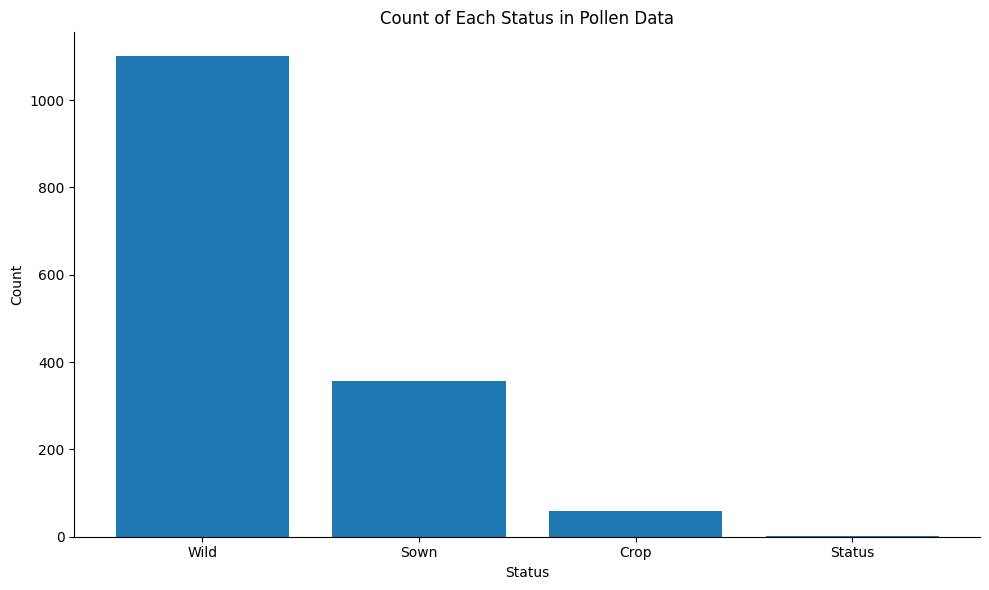

In [625]:
# Get value counts for Status column
value_counts = pollen_load_data['Status'].value_counts()

# Select top 5 statuses
value_counts = value_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.tight_layout()
plt.show()

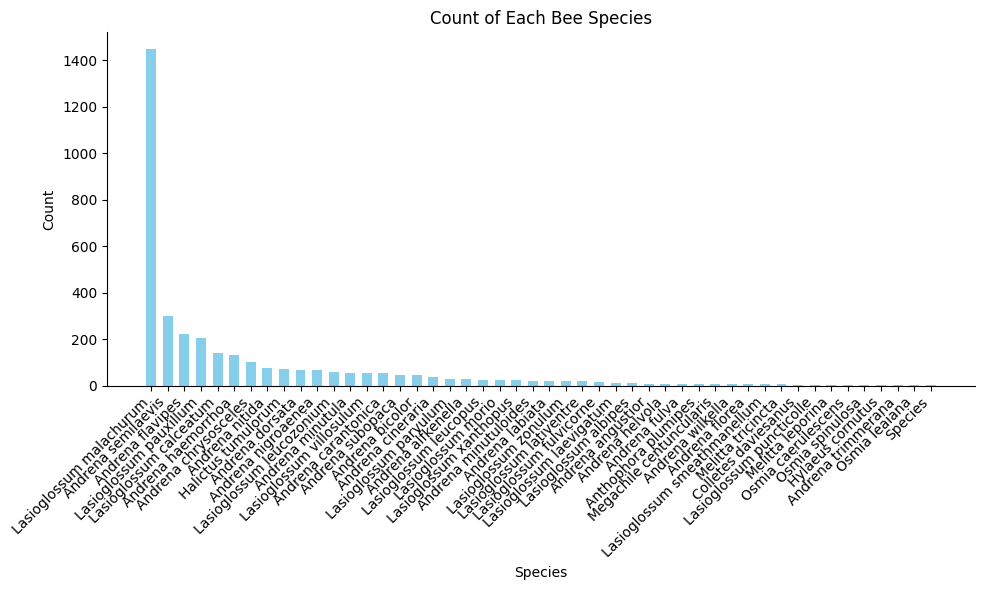

Plotted 48 categories
Showing top 5 categories


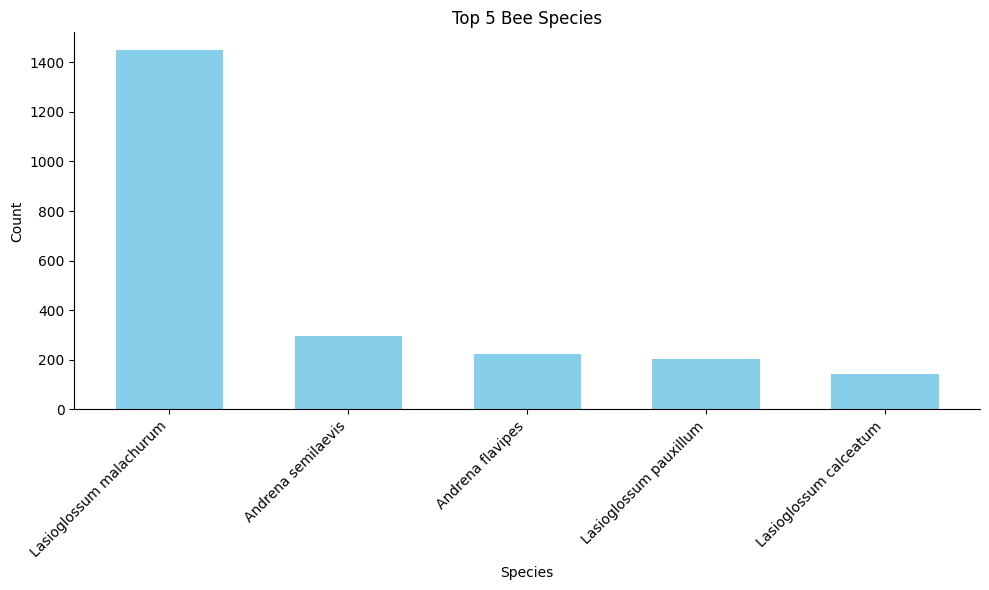

Plotted 5 categories


In [626]:
def safe_bar_plot(data, column_name, title=None, top_n=None):
    """Safely create a bar plot for categorical data"""
    
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    # Create value counts
    value_counts = data[column_name].value_counts().sort_values(ascending=False)
    
    if len(value_counts) == 0:
        print(f"No data found in column '{column_name}'")
        return
    
    # Optionally select top N categories
    if top_n:
        value_counts = value_counts.head(top_n)
        print(f"Showing top {top_n} categories")
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='skyblue', width=0.6)
    
    # Clean up the plot
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(title or f'Distribution of {column_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(value_counts)} categories")

# Usage:
safe_bar_plot(pollen_df, 'Species', 'Count of Each Bee Species')
safe_bar_plot(pollen_df, 'Species', 'Top 5 Bee Species', top_n=5)

In [627]:
# Check data types to find categorical columns
print("Column data types:")
print(pollen_df.dtypes)

# Look for text/object columns that might represent species
categorical_cols = pollen_df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns: {categorical_cols.tolist()}")

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\n{col} unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion      object
Weight          object
dtype: object

Categorical columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Farm unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']

Type unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']

Round unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]

Date unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']

Species unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']

Load unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']

Netted on unique values: 62
Sample v

In [628]:
# Load the pollen data
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')

# Check the info
print(pollen_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None


In [629]:
# Load both datasets
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')

# Check the structure of both DataFrames
print("=== Pollen DataFrame Info ===")
print(pollen_df.info())
print("\n=== Visit DataFrame Info ===")
print(visit_df.info())

# Preview the data
print("\n=== Pollen DataFrame Sample ===")
print(pollen_df.head())
print("\n=== Visit DataFrame Sample ===")
print(visit_df.head())

=== Pollen DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

=== Visit DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      246

In [630]:
def safe_load_data():
    """Safely load and examine bee pollen data"""
    
    # Check if files exist
    pollen_file = '../data/2015_pollen_load_data.csv'
    visit_file = '../data/2013_2015_flower_visitation_data.csv'
    
    if not os.path.exists(pollen_file):
        print(f"❌ File not found: {pollen_file}")
        return None, None
    
    if not os.path.exists(visit_file):
        print(f"❌ File not found: {visit_file}")
        return None, None
    
    try:
        # Load data
        pollen_df = pd.read_csv(pollen_file)
        visit_df = pd.read_csv(visit_file)
        
        print("✅ Data loaded successfully!")
        print(f"Pollen data shape: {pollen_df.shape}")
        print(f"Visit data shape: {visit_df.shape}")
        
        return pollen_df, visit_df
        
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, None

# Load the data safely
pollen_df, visit_df = safe_load_data()

#  Check info if data loaded successfully
if pollen_df is not None:
    print("\n=== Pollen DataFrame Info ===")
    print(pollen_df.info())
    
    print("\n=== First 5 rows ===")
    print(pollen_df.head())
else:
    print("Could not load pollen data")

✅ Data loaded successfully!
Pollen data shape: (3523, 11)
Visit data shape: (2467, 11)

=== Pollen DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

=== First 5 rows ===
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   

In [631]:
# Check what columns exist and their data types
print("All columns and their types:")
for col in pollen_df.columns:
    dtype = pollen_df[col].dtype
    sample_val = str(pollen_df[col].iloc[0]) if len(pollen_df) > 0 else 'N/A'
    print(f"{col}: {dtype} | Sample: {sample_val}")

# Look for potential load columns
print("\nPotential load columns:")
load_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['load', 'weight', 'mass', 'size', 'amount'])]
for col in load_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

# Look for species columns  
print("\nPotential species columns:")
species_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['species', 'bee', 'type', 'genus', 'name'])]
for col in species_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

All columns and their types:
Farm: object | Sample: Farm1
Type: object | Sample: ELS
Round: object | Sample: One
Date: object | Sample: 24/04/2015
Species: object | Sample: Andrena bicolor
Load: object | Sample: 1
Netted on: object | Sample: Sinapis arvensis
Plant pollen: object | Sample: Sinapis arvensis
Status: object | Sample: Wild
Proportion: object | Sample: 100
Weight: object | Sample: 100

Potential load columns:
- Load: object
  Unique values: ['1' '0.25' '0.75' '0.5' '0.125']
- Weight: object
  Unique values: ['100' '25' '75' '50' '12.5']

Potential species columns:
- Type: object
  Unique values: ['ELS' 'HLS' nan 'Type']
- Species: object
  Unique values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']


In [632]:
# Data comprise flower abundance and diversity data and bee abundance, diversity and activity data collected during extensive surveys 
#carried out on farms in Hampshire and West Sussex, southern England between 2013 and 2015. The pollen diets of wild solitary bees were 
#quantified using direct observations and pollen load analysis. The purpose of the study was to provide valuable information to scientists, 
#governments and land managers in designing more effective measures to conserve the broader wild bee community on agricultural land. The 
#work was funded by the Natural Environment Research Council grant NE/J016802/1 and the Game and Wildlife Conservation Trust.
#I broke down the Species to see all the different types of bees that were in the dataset. I also looked at the Average Load column to see how many
#of each analysis there were.

In [633]:
# Load the data
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

# Find date columns
print("Looking for date columns...")
for col in pollen_load_data.columns:
    print(f"Column: {col}")
    print(f"Sample values: {pollen_load_data[col].head()}")
    print("-" * 30)


Looking for date columns...
Column: Farm
Sample values: 0    Farm1
1    Farm1
2    Farm1
3    Farm1
4    Farm1
Name: Farm, dtype: object
------------------------------
Column: Type
Sample values: 0    ELS
1    ELS
2    ELS
3    ELS
4    ELS
Name: Type, dtype: object
------------------------------
Column: Round
Sample values: 0    One
1    One
2    One
3    One
4    One
Name: Round, dtype: object
------------------------------
Column: Date
Sample values: 0    24/04/2015
1    24/04/2015
2    24/04/2015
3    24/04/2015
4    24/04/2015
Name: Date, dtype: object
------------------------------
Column: Species
Sample values: 0        Andrena bicolor
1        Andrena bicolor
2        Andrena bicolor
3    Andrena carantonica
4    Andrena carantonica
Name: Species, dtype: object
------------------------------
Column: Load
Sample values: 0       1
1    0.25
2    0.75
3       1
4       1
Name: Load, dtype: object
------------------------------
Column: Netted on
Sample values: 0    Sinapis arvensis

In [634]:
# Check data types without date conversion
print("Data Types:")
print(pollen_load_data.dtypes)

# Convert only categorical columns that exist
if 'Species' in pollen_load_data.columns:
    pollen_load_data['Species'] = pollen_load_data['Species'].astype('category')
else:
    print("No 'Species' column found")

Data Types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion      object
Weight          object
dtype: object


In [635]:
# Clean the Date column before conversion
if 'Date' in pollen_load_data.columns:
    print("Original Date column sample:")
    print(pollen_load_data['Date'].head(10))
    
    # Remove rows where Date column contains non-date strings
    mask = ~pollen_load_data['Date'].astype(str).str.lower().isin(['date', 'nan', 'null', ''])
    clean_data = pollen_load_data[mask].copy()
    
    print(f"\nData cleaning results:")
    print(f"Original rows: {len(pollen_load_data)}")
    print(f"Clean rows: {len(clean_data)}")
    print(f"Removed rows: {len(pollen_load_data) - len(clean_data)}")
    
    #  Convert the cleaned data
    try:
        clean_data['Date'] = pd.to_datetime(clean_data['Date'], dayfirst=True)
        print("Date conversion successful!")
        print(f"Date range: {clean_data['Date'].min()} to {clean_data['Date'].max()}")
        
        # Replace the original dataframe with cleaned version
        pollen_load_data = clean_data
        
    except Exception as e:
        print(f"Error even after cleaning: {e}")
        print("Sample of remaining Date values:")
        print(clean_data['Date'].unique()[:10])
else:
    print("'Date' column not found in data")

Original Date column sample:
0    24/04/2015
1    24/04/2015
2    24/04/2015
3    24/04/2015
4    24/04/2015
5    24/04/2015
6    24/04/2015
7    24/04/2015
8    24/04/2015
9    24/04/2015
Name: Date, dtype: object

Data cleaning results:
Original rows: 3523
Clean rows: 3520
Removed rows: 3
Date conversion successful!
Date range: 2015-04-22 00:00:00 to 2015-08-10 00:00:00


In [636]:
# Inspect the Date column thoroughly
if 'Date' in pollen_load_data.columns:
    print("Date column inspection:")
    print(f"Data type: {pollen_load_data['Date'].dtype}")
    print(f"Total values: {len(pollen_load_data['Date'])}")
    print(f"Unique values: {pollen_load_data['Date'].nunique()}")
    
    print(f"\nFirst 15 values:")
    print(pollen_load_data['Date'].head(15).tolist())
    
    print(f"\nValue around position 31:")
    if len(pollen_load_data) > 35:
        print(pollen_load_data['Date'].iloc[28:35].tolist())
    
    print(f"\nUnique values (first 20):")
    print(pollen_load_data['Date'].unique()[:20])
    
    # Check for the specific problematic value
    problem_rows = pollen_load_data[pollen_load_data['Date'].astype(str) == 'Date']
    if len(problem_rows) > 0:
        print(f"\nFound {len(problem_rows)} rows with 'Date' as value:")
        print(problem_rows.head())

Date column inspection:
Data type: datetime64[ns]
Total values: 3520
Unique values: 30

First 15 values:
[Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00')]

Value around position 31:
[Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00')]

Unique values (first 20):
<DatetimeArray>
['2015-04-24 00:00:00', '2015-06-16 00:00:00', '2015-06-29 00:00:00',
 '201

In [637]:
# Summary statistics
print(pollen_load_data.describe())

                                Date
count                           3520
mean   2015-06-21 01:37:21.818181888
min              2015-04-22 00:00:00
25%              2015-06-10 00:00:00
50%              2015-06-27 00:00:00
75%              2015-07-03 00:00:00
max              2015-08-10 00:00:00


In [638]:
# Check available columns
print("Available columns:")
print(pollen_load_data.columns.tolist())

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [639]:
# Check what columns exist
print("Available columns:")
print(pollen_load_data.columns.tolist())

# Check data types to find numeric columns
print("\nColumn data types:")
print(pollen_load_data.dtypes)

# Look for numeric columns that might represent load/weight
numeric_cols = pollen_load_data.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumeric columns: {numeric_cols.tolist()}")

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Column data types:
Farm                    object
Type                    object
Round                   object
Date            datetime64[ns]
Species               category
Load                    object
Netted on               object
Plant pollen            object
Status                  object
Proportion              object
Weight                  object
dtype: object

Numeric columns: []


In [640]:
# Show first few rows to understand the data
print("First 5 rows:")
print(pollen_load_data.head())

# Show summary statistics for numeric columns
print("\nNumeric column summaries:")
print(pollen_load_data.describe())

First 5 rows:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Numeric column summaries:
                                Date
count                           3520
mean   2015-06-21 01:37:21.818181888
min              2015-04-22 00:00:00
25%              2015-06-10 00:00:00
50%              

In [641]:
# Get correlation matrix for all numeric columns
numeric_data = pollen_load_data.select_dtypes(include=['number'])
if len(numeric_data.columns) > 1:
    correlation_matrix = numeric_data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
else:
    print("Not enough numeric columns for correlation analysis")

Not enough numeric columns for correlation analysis


In [642]:
# Calculate correlation for all numeric columns automatically
numeric_data = pollen_load_data.select_dtypes(include=['number'])

if len(numeric_data.columns) >= 2:
    correlation_matrix = numeric_data.corr()
    print("Correlation Matrix for all numeric columns:")
    print(correlation_matrix)
    
    # Create the heatmap with actual data

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix: All Numeric Columns')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough numeric columns for correlation. Found: {numeric_data.columns.tolist()}")

Not enough numeric columns for correlation. Found: []


In [643]:
# Use cleaned data for all analysis
print("My actual bee pollen data:")
print(pollen_load_data.head())
print(f"Shape: {pollen_load_data.shape}")
print(f"Columns: {pollen_load_data.columns.tolist()}")

My actual bee pollen data:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  
Shape: (3520, 11)
Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


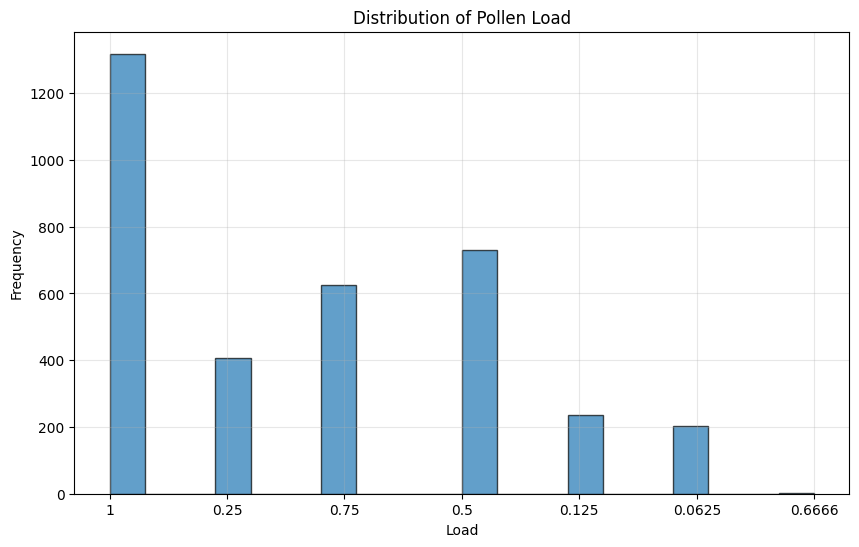

Plotted 3520 valid values


In [644]:
def safe_histogram(data, column_name, title="Distribution"):
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    clean_data = data[column_name].dropna()
    
    if len(clean_data) == 0:
        print(f"No valid data found in column '{column_name}'")
        return
    
    plt.figure(figsize=(10, 6))
    plt.hist(clean_data, bins=20, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Plotted {len(clean_data)} valid values")

# Usage 
safe_histogram(pollen_load_data, 'Load', 'Distribution of Pollen Load')

In [645]:
# Use the correct relative path
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')  

In [646]:
# Check what files are in the data directory
print("\nFiles in ../data directory:")
try:
    print(os.listdir('../data'))
except FileNotFoundError:
    print("../data directory not found")

# Check your current working directory
print(f"\nCurrent working directory: {os.getcwd()}")


Files in ../data directory:
['2013_2015_flower_visitation_data.csv', '2015_pollen_load_data.csv']

Current working directory: c:\Github\wuuwuudata.github.io-main\plots_kelseyschneider\notebooks


In [647]:
# Read my data
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')

In [648]:
# Find common columns between both DataFrames
common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
print("Common columns between datasets:")
print(list(common_cols))

# Check the structure of both DataFrames
print("\nPollen DataFrame columns:")
print(pollen_df.columns.tolist())

print("\nVisit DataFrame columns:")
print(visit_df.columns.tolist())

Common columns between datasets:
['Status', 'Round', 'Species', 'Farm', 'Date', 'Type']

Pollen DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Visit DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']


In [649]:
# Look for potential merge keys
for col in common_cols:
    print(f"\nColumn: {col}")
    print(f"Pollen DF - Type: {pollen_df[col].dtype}, Unique values: {pollen_df[col].nunique()}")
    print(f"Visit DF - Type: {visit_df[col].dtype}, Unique values: {visit_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:3]}")


Column: Status
Pollen DF - Type: object, Unique values: 4
Visit DF - Type: object, Unique values: 4
Sample values: ['Wild' 'Sown' 'Crop']

Column: Round
Pollen DF - Type: object, Unique values: 5
Visit DF - Type: object, Unique values: 5
Sample values: ['One' 'Two' 'Three']

Column: Species
Pollen DF - Type: object, Unique values: 48
Visit DF - Type: object, Unique values: 87
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata']

Column: Farm
Pollen DF - Type: object, Unique values: 17
Visit DF - Type: object, Unique values: 22
Sample values: ['Farm1' 'Farm10' 'Farm11']

Column: Date
Pollen DF - Type: object, Unique values: 31
Visit DF - Type: object, Unique values: 84
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015']

Column: Type
Pollen DF - Type: object, Unique values: 3
Visit DF - Type: object, Unique values: 3
Sample values: ['ELS' 'HLS' nan]


In [650]:
# Safe string conversion for any column
def safe_string_conversion(data, column_name):
    """Safely convert a column to string"""
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return False
    
    try:
        data[column_name] = data[column_name].astype(str)
        print(f"Successfully converted '{column_name}' to string")
        return True
    except Exception as e:
        print(f"Error converting '{column_name}' to string: {e}")
        return False

# Find the correct date column first
date_col = None
for col in pollen_df.columns:
    if 'date' in col.lower():
        date_col = col
        break

if date_col:
    safe_string_conversion(pollen_df, date_col)
else:
    print("No date column found. Available columns:")
    print(pollen_df.columns.tolist())

Successfully converted 'Date' to string


In [651]:
def safe_merge_and_check_missing(df1, df2, merge_col=None):
    """Safely merge two DataFrames and check for missing values"""
    
    # Find common columns if merge_col not specified
    if merge_col is None:
        common_cols = set(df1.columns).intersection(set(df2.columns))
        if not common_cols:
            print("No common columns found for merging")
            return None
        merge_col = list(common_cols)[0]
    
    # Check if merge column exists in both DataFrames
    if merge_col not in df1.columns:
        print(f"Column '{merge_col}' not found in first DataFrame")
        print(f"Available columns: {df1.columns.tolist()}")
        return None
    
    if merge_col not in df2.columns:
        print(f"Column '{merge_col}' not found in second DataFrame")
        print(f"Available columns: {df2.columns.tolist()}")
        return None
    
    try:
        # Perform the merge
        merged_df = pd.merge(df1, df2, on=merge_col, how='inner')
        print(f"Successfully merged DataFrames on '{merge_col}'")
        print(f"Merged DataFrame shape: {merged_df.shape}")
        
        # Check for missing values
        missing = merged_df.isnull().sum()
        print("\nMissing values per column:")
        print(missing[missing > 0])  # Only show columns with missing values
        
        return merged_df
        
    except Exception as e:
        print(f"Error during merge: {e}")
        return None

# Usage
merged_df = safe_merge_and_check_missing(pollen_df, visit_df)

Successfully merged DataFrames on 'Status'
Merged DataFrame shape: (5395549, 21)

Missing values per column:
Type_x          4
Round_x         4
Species_x       4
Load            4
Netted on       4
Plant pollen    4
Status          4
Proportion      4
Weight          4
Type_y          4
Round_y         4
Date_y          4
Species_y       4
Number          4
Caste           4
Visiting        4
Purpose         4
Family          4
dtype: int64


In [652]:
# Step 1: Check if DataFrames exist
print("Checking DataFrames...")
print(f"pollen_df type: {type(pollen_df)}")
print(f"visit_df type: {type(visit_df)}")

if pollen_df is not None and visit_df is not None:
    # Step 2: Find merge columns
    common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
    print(f"Common columns: {list(common_cols)}")
    
    if common_cols:
        # Step 3: Attempt merge
        merge_col = list(common_cols)[0]
        print(f"Attempting to merge on: '{merge_col}'")
        
        try:
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            print(f"Merge successful! Shape: {merged_df.shape}")
            
            # Step 4: Check for required columns before cleaning
            required_cols = ['Species', 'Load']
            available_cols = merged_df.columns.tolist()
            
            print(f"Required columns: {required_cols}")
            print(f"Available columns: {available_cols}")
            
            missing_required = [col for col in required_cols if col not in available_cols]
            
            if not missing_required:
                # Step 5: Safe dropna
                initial_shape = merged_df.shape
                merged_df = merged_df.dropna(subset=required_cols)
                final_shape = merged_df.shape
                
                print(f"Cleaned data: {initial_shape} -> {final_shape}")
            else:
                print(f"Cannot clean data - missing columns: {missing_required}")
                
        except Exception as e:
            print(f"Merge failed: {e}")
            merged_df = None
    else:
        print("No common columns for merging")
        merged_df = None
else:
    print("One or both DataFrames are None")
    merged_df = None

# Step 6: Final check
if merged_df is not None:
    print(f"Final merged_df shape: {merged_df.shape}")
    print("Success!")
else:
    print("merged_df is still None - check the steps above")

Checking DataFrames...
pollen_df type: <class 'pandas.core.frame.DataFrame'>
visit_df type: <class 'pandas.core.frame.DataFrame'>
Common columns: ['Status', 'Round', 'Species', 'Farm', 'Date', 'Type']
Attempting to merge on: 'Status'
Merge successful! Shape: (5395549, 21)
Required columns: ['Species', 'Load']
Available columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Purpose', 'Family']
Cannot clean data - missing columns: ['Species']
Final merged_df shape: (5395549, 21)
Success!


In [653]:
actual_load_column = 'Load'  

if actual_load_column in pollen_load_data.columns:
    print("Unique values:")
    print(pollen_load_data[actual_load_column].unique())
    
    print("\nDescriptive statistics:")
    print(pollen_load_data[actual_load_column].describe())
else:
    print(f"Column '{actual_load_column}' not found")

Unique values:
['1' '0.25' '0.75' '0.5' '0.125' '0.0625' '0.6666']

Descriptive statistics:
count     3520
unique       7
top          1
freq      1318
Name: Load, dtype: object


In [654]:
def explore_column(data, column_name):
    """Safely explore a column's values and statistics"""
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    print(f"Exploring column: {column_name}")
    print(f"Data type: {data[column_name].dtype}")
    print(f"Non-null count: {data[column_name].count()}/{len(data)}")
    
    if data[column_name].dtype in ['object', 'category']:
        print("Unique values:")
        print(data[column_name].unique())
        print("\nValue counts:")
        print(data[column_name].value_counts())
    else:
        print("Descriptive statistics:")
        print(data[column_name].describe())
        print("\nUnique values (first 10):")
        print(data[column_name].unique()[:10])

# Usage
explore_column(pollen_load_data, '<<<<<<< HEAD')

Column '<<<<<<< HEAD' not found. Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [655]:
# First, load the data and see what I'm working with
print("Dataset shape:", pollen_load_data.shape)
print("\nAll columns:")
for i, col in enumerate(pollen_load_data.columns):
    print(f"{i}: {col}")

# Show first few rows to understand the data structure
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset shape: (3520, 11)

All columns:
0: Farm
1: Type
2: Round
3: Date
4: Species
5: Load
6: Netted on
7: Plant pollen
8: Status
9: Proportion
10: Weight

First 5 rows:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


In [656]:
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,2015-04-24,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,2015-04-24,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,2015-04-24,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [657]:
# See what my data looks like
print("Dataset shape:", pollen_load_data.shape)
print("\nColumn info:")
for col in pollen_load_data.columns:
    dtype = pollen_load_data[col].dtype
    sample_val = str(pollen_load_data[col].iloc[0]) if len(pollen_load_data) > 0 else 'N/A'
    print(f"{col}: {dtype} | Sample: {sample_val}")

Dataset shape: (3520, 11)

Column info:
Farm: object | Sample: Farm1
Type: object | Sample: ELS
Round: object | Sample: One
Date: datetime64[ns] | Sample: 2015-04-24 00:00:00
Species: category | Sample: Andrena bicolor
Load: object | Sample: 1
Netted on: object | Sample: Sinapis arvensis
Plant pollen: object | Sample: Sinapis arvensis
Status: object | Sample: Wild
Proportion: object | Sample: 100
Weight: object | Sample: 100


In [658]:
# Check the original CSV file to see the proper column names
import pandas as pd
raw_data = pd.read_csv('../data/2015_pollen_load_data.csv')
print("Original CSV columns:")
print(raw_data.columns.tolist())
print(f"\nDataset shape: {raw_data.shape}")
print(f"\nFirst few rows:")
print(raw_data.head())

Original CSV columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Dataset shape: (3523, 11)

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


In [659]:
# The CSV was corrupted by Git merge conflict
# Try to parse it properly by treating it as space-separated values
try:
    # Read as space-separated values instead
    pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\s+', engine='python')
    print("Fixed columns:")
    print(pollen_data_fixed.columns.tolist())
    print(f"\nFixed dataset shape: {pollen_data_fixed.shape}")
    print(f"\nFirst few rows:")
    print(pollen_data_fixed.head())
except Exception as e:
    print(f"Error reading with space separator: {e}")
    
    # Alternative: try tab-separated
    try:
        pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\t')
        print("Tab-separated columns:")
        print(pollen_data_fixed.columns.tolist())
    except Exception as e2:
        print(f"Error with tab separator: {e2}")
        print("The CSV file needs manual fixing")

Error reading with space separator: Expected 4 fields in line 24, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Tab-separated columns:
['Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight']


<>:5: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:5: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\schne\AppData\Local\Temp\ipykernel_21896\3412448640.py:5: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\s+', engine='python')


In [660]:
# The CSV file is actually properly formatted! 
# Load it correctly and replace the corrupted pollen_load_data
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

print("Properly loaded columns:")
print(pollen_load_data.columns.tolist())
print(f"\nDataset shape: {pollen_load_data.shape}")
print(f"\nFirst few rows:")
print(pollen_load_data.head())

# Drop the unnamed columns (empty columns at the end)
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col) or col == '']
if unnamed_cols:
    pollen_load_data = pollen_load_data.drop(columns=unnamed_cols)
    print(f"\nDropped unnamed columns: {unnamed_cols}")

print(f"\nFinal cleaned columns:")
print(pollen_load_data.columns.tolist())

Properly loaded columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Dataset shape: (3523, 11)

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Final cleaned columns:
['Farm', 'Type', 'Round', 'D

In [661]:
# The CSV file had Git merge conflict markers in it
# Manually fix this by creating a clean version

# Read the raw file and fix the header
with open('../data/2015_pollen_load_data.csv', 'r') as f:
    lines = f.readlines()

print("First few lines of raw file:")
for i, line in enumerate(lines[:5]):
    print(f"Line {i}: {repr(line)}")

# The header line seemed to be the issue - Fix it
if len(lines) > 0:
    # Check if first line contains the merge conflict marker
    first_line = lines[0]
    if '<<<<<<< HEAD' in first_line:
        # Replace the problematic header with the correct one
        correct_header = "Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight\n"
        lines[0] = correct_header
        
        # Also remove any remaining Git merge markers from the data
        cleaned_lines = []
        for line in lines:
            if not any(marker in line for marker in ['<<<<<<< HEAD', '======', '>>>>>>> ']):
                cleaned_lines.append(line)
        
        # Create a StringIO object to read the corrected data
        cleaned_csv = io.StringIO(''.join(cleaned_lines))
        pollen_load_data = pd.read_csv(cleaned_csv)
        
        print(f"\nCleaned dataset:")
        print(f"Columns: {pollen_load_data.columns.tolist()}")
        print(f"Shape: {pollen_load_data.shape}")
        print(f"First few rows:")
        print(pollen_load_data.head())

First few lines of raw file:
Line 0: 'Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight\n'
Line 1: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100\n'
Line 2: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25\n'
Line 3: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75\n'
Line 4: 'Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100\n'
